In [1]:
import torch
from models.gmm import GMM
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans

### Hyperparameters

In [2]:
seed = 42
K = 10 
dim = 2

epochs = 500
lr = 0.01

n_slices = 1

algos = ["SSM"]

### Functions

In [3]:
def create_grid(x_lim = (-1.5, 2.5), y_lim = (-1, 1.5)):
    x = torch.linspace(x_lim[0], x_lim[1], 100)
    y = torch.linspace(y_lim[0], y_lim[1], 100)
    X, Y = torch.meshgrid(x, y, indexing='ij')
    grid = torch.column_stack([X.flatten(), Y.flatten()])

    return (X, Y, grid)

def plot_eval(model, grid, algorithm):
    fig_model, ax_model = plt.subplots(2, 2, figsize=(15, 10))
    fig_model.suptitle(algorithm)

    plot_loss(model, ax_model[0, 0])
    plot_logp(model, ax_model[0, 1])
    plot_samples(model, ax_model[1, 0])
    plot_density(model, grid, ax_model[1, 1])

    return fig_model

def plot_samples(model, ax=plt):

    samples = model.sample(500)
    ax.set_title("Samples")
    ax.scatter(samples[:, 0], samples[:, 1])

def plot_density(model, grid, ax=plt):

    X, Y, grid = grid

    with torch.no_grad():
        density = torch.exp(model(grid))

    ax.set_title("Density")
    ax.contour(X, Y, density.reshape(X.shape), levels=200)

def plot_loss(model, ax=plt):
    ax.set_title("loss")
    ax.plot(model.get_loss())

def plot_logp(model, ax):
    ax.set_title("logp")
    ax.plot(model.get_logp())
   

### Create Data

In [4]:
data, target = make_moons(n_samples=500, noise=0.1, random_state=seed)
# plt.scatter(data[:, 0], data[:, 1], c=blue, cmap=plt.cm.RdYlBu)

kmeans = KMeans(K, random_state=seed)
kmeans.fit(data)
centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

### Learn Models

In [5]:
models = []

for a in algos:
    model = GMM(K, dim, centers)
    model.fit(data, a, epochs, lr, n_slices)
    models.append(model)

SSM-logp = 1.3095139265060425


### Eval models

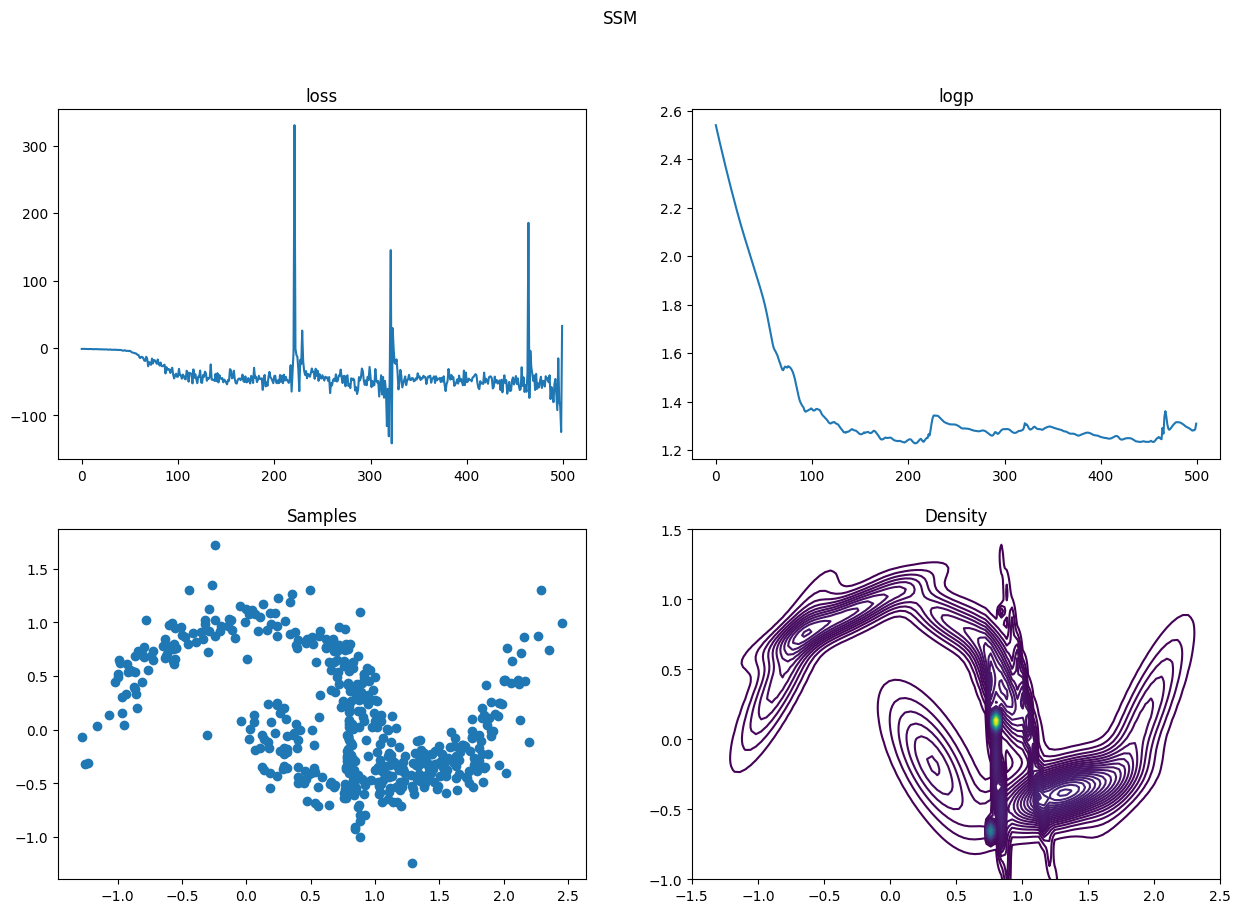

In [6]:
grid = create_grid()

figs_models = []
for m, a in zip(models, algos):
    figs_models.append(plot_eval(m, grid, a))


### Notes

SGD always performs best - negative logp around 1

most of the time ssm also performs better than ssm but depends on hyperparam

lr: 

< 0.001 nothing gets learned 

0.1 works for sgd, somewhat for sm, not for ssm 

epochs: 

50 - already works well for sgd 

for sm and ssm at least 100, the more the better
